In [ ]:
# Face Mask Detection using Convolutional Neural Network

# We have 2 folders here with and without mask, we wil label them, convert them into numpy array and carry out the process.

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 157M/163M [00:01<00:00, 130MB/s]
100% 163M/163M [00:01<00:00, 93.3MB/s]


In [4]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("The dataset has been extracted!")

The dataset has been extracted!


In [24]:
import os
import cv2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

from sklearn.model_selection import train_test_split

In [8]:
# With mask no of files

filename = os.listdir("/content/data/with_mask")
print(len(filename))

3725


In [9]:
# without mask no of files

filename = os.listdir("/content/data/without_mask")
print(len(filename))

3828


In [10]:
# Now giving them labels :-

with_mask = [1]*3725

In [11]:
without_mask = [0]*3828

In [20]:
# Combining the labels

labels = with_mask+without_mask

In [19]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


array([[[101,  45,   0],
        [104,  48,   1],
        [114,  58,   9],
        ...,
        [ 90,  56,  29],
        [ 92,  58,  31],
        [ 88,  53,  31]],

       [[136,  80,  33],
        [140,  84,  37],
        [144,  88,  39],
        ...,
        [ 82,  48,  21],
        [ 81,  47,  22],
        [ 87,  52,  30]],

       [[138,  82,  35],
        [140,  84,  37],
        [136,  80,  33],
        ...,
        [ 76,  42,  15],
        [ 72,  38,  13],
        [ 77,  42,  20]],

       ...,

       [[187, 146,  80],
        [184, 143,  77],
        [185, 144,  78],
        ...,
        [207, 169, 104],
        [203, 165, 100],
        [185, 146,  81]],

       [[191, 151,  82],
        [188, 148,  79],
        [182, 142,  73],
        ...,
        [209, 172, 104],
        [209, 172, 104],
        [196, 157,  90]],

       [[192, 152,  83],
        [189, 149,  80],
        [185, 145,  76],
        ...,
        [216, 179, 111],
        [217, 180, 112],
        [207, 168, 101]]], dtype=uint8)
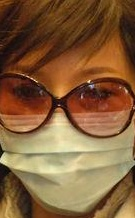

In [16]:
# with mask image

img = mpimg.imread("/content/data/with_mask/with_mask_10.jpg")
img

array([[[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[ 31,  31,  31],
        [ 43,  43,  43],
        [ 45,  45,  45],
        ...,
        [ 34,  34,  34],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[ 36,  36,  36],
        [ 45,  45,  45],
        [ 46,  46,  46],
        ...,
        [ 35,  35,  35],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[ 37,  37,  37],
        [ 45,  45,  45],
        [ 49,  49,  49],
        ...,
        [ 33,  33,  33],
        [ 26,  26,  26],
        [ 26,  26,  26]]], dtype=uint8)
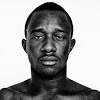

In [17]:
# without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
img

In [26]:
# for with mask, resizing the images and converting them into numpy array

img_array = []

path = '/content/data/with_mask/'

for i in range(3725):
  filename = os.listdir("/content/data/with_mask")[i]
  img_path = path+filename

  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert("RGB")

  img_array.append(img)

img_array_with_mask = np.array(img_array)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [35]:
img_array_with_mask.shape

(3725, 128, 128, 3)

In [34]:
# for without mask, resizing the images and converting them into numpy array

img_array2 = []

path = '/content/data/without_mask/'

for i in range(3828):
  filename = os.listdir('/content/data/without_mask')[i]
  img_path = path+filename

  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert("RGB")

  img_array2.append(img)

img_array_without_mask  = np.array(img_array)

In [36]:
img_array_without_mask.shape

(3828, 128, 128, 3)

In [37]:
arrays = np.concatenate((img_array_with_mask, img_array_without_mask), axis=0)

In [38]:
arrays

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  1,   1,   1],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[139, 139, 139],
         [149, 149, 149],
         [159, 159, 159],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  1,   0,   2],
         [  3,   0,   0],
         [  1,   0,   0],
         ...,
         [ 98,  80,  65],
         [ 92,  73,  62],
         [108,  88,  78]],

        [[  1,   0,   2],
         [  3,   0,   0],
         [  2,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  1,   0,   2],
         [  3,   0,   0],
         [  2,   0,   0],
         ...,
         [  0,   1,   0],
        

## **Splitting the data **

In [43]:
X = arrays

In [47]:
Y = np.array(labels)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, stratify=Y)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [51]:
X_train = X_train/255

In [52]:
X_test = X_test/255

## **Building Neural Network**

In [54]:
import tensorflow as tf
from tensorflow import keras

In [55]:
model = keras.Sequential([keras.layers.Conv2D(32, input_shape=(128,128,3), kernel_size=(3,3), activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dropout(0.5),

                          keras.layers.Dense(64, activation="relu"),
                          keras.layers.Dropout(0.5),

                          keras.layers.Dense(2, activation="sigmoid")


                          ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 161s 928ms/step - accuracy: 0.7219 - loss: 0.7223 - val_accuracy: 0.8992 - val_loss: 0.2667
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 196s 897ms/step - accuracy: 0.8705 - loss: 0.3121 - val_accuracy: 0.8992 - val_loss: 0.2647
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 199s 879ms/step - accuracy: 0.8923 - loss: 0.2724 - val_accuracy: 0.9190 - val_loss: 0.1944
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 200s 865ms/step - accuracy: 0.9239 - loss: 0.2022 - val_accuracy: 0.9289 - val_loss: 0.1782
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 205s 886ms/step - accuracy: 0.9314 - loss: 0.1741 - val_accuracy: 0.9174 - val_loss: 0.2179
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 201s 880ms/step - accuracy: 0.9400 - loss: 0.1520 - val_accuracy: 0.9289 - val_loss: 0.2042
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 843ms/step - accuracy: 0.9420 - loss: 0.1443 - val_accuracy: 0.9223 - val_loss: 0.2121
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 200s 830ms/step - accuracy: 0.9511 -

In [96]:
# You can also plot the above cell to see the loss decreasing and accuracy increasing

In [58]:
model.evaluate(X_test, Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.9292 - loss: 0.3318


[0.27021583914756775, 0.9318332076072693]

In [86]:
image = input('What is the path of your image?')
img = cv2.imread(image)

What is the path of your image?/content/without_mask.jpg


In [87]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [88]:
img = cv2.resize(img, (128,128))

In [89]:
img = img/255

In [90]:
img = np.reshape(img, [1,128,128,3])

In [91]:
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [92]:
print(prediction)

[[0.9353802  0.19360857]]


In [93]:
prediction_labels = [np.argmax(prediction)]

In [94]:
print(prediction_labels)

[0]


In [95]:
if prediction_labels[0]==1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing a mask')

The person in the image is not wearing a mask
